In [2]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
# Download and load the training data
trainset = datasets.FashionMNIST('/home/jupyter/pytorch-codes/datasets/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [6]:
# Download and load the test data
testset = datasets.FashionMNIST('/home/jupyter/pytorch-codes/datasets/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

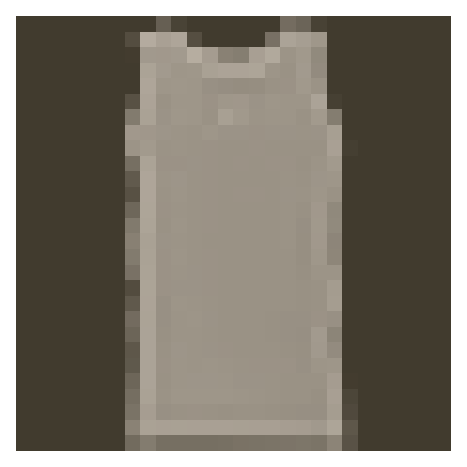

In [7]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :]);

## Building the network

In [8]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

# Train the network

In [9]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [10]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_probs = model(images)
        loss = criterion(log_probs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5181477009964142
Training loss: 0.3922470107293332
Training loss: 0.3520657843125782
Training loss: 0.33391431235332986
Training loss: 0.3172498081904103


## Test the network!

In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [12]:
img = images[1]

In [13]:
with torch.no_grad():
    log_probs = model(img)
    
probs = torch.exp(log_probs)

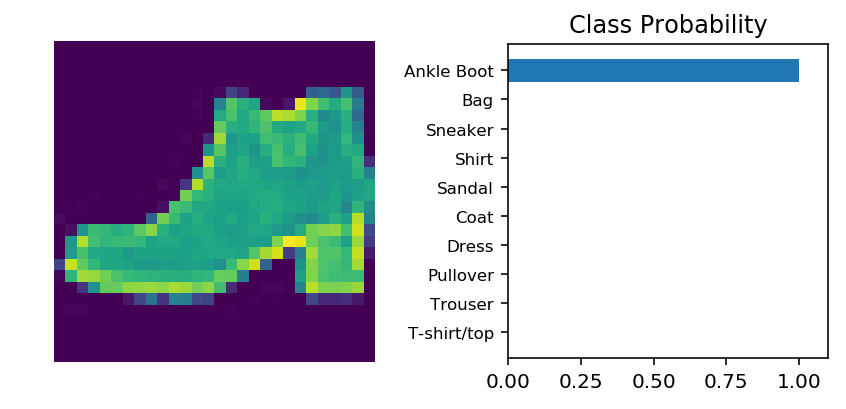

In [14]:
# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), probs, version='Fashion')